In [249]:
from pandas import *
from scipy import stats
import numpy as np
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

In [250]:
df=pd.read_csv("/content/drive/MyDrive/data/customer_demographics.csv")
df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5


In [251]:
df["age_range"][0]

'70+'

In [252]:
df["age_range"]=df["age_range"].astype("str")

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [254]:
df["age_range"].unique()


array(['70+', '46-55', '26-35', '36-45', '18-25', '56-70'], dtype=object)

In [255]:
df["family_size"].unique()

array(['2', '3', '4', '1', '5+'], dtype=object)

In [256]:
df["family_size"]=df["family_size"].replace('5+', '5')

In [257]:
df["family_size"].unique()

array(['2', '3', '4', '1', '5'], dtype=object)

In [258]:
df["family_size"]=df["family_size"].astype("int")

In [259]:
df["age_grup"]=""

In [260]:
df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,age_grup
0,1,70+,Married,0,2,NaN,4,
1,6,46-55,Married,0,2,NaN,5,
2,7,26-35,NaN,0,3,1,3,
3,8,26-35,NaN,0,4,2,6,
4,10,46-55,Single,0,1,NaN,5,
...,...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5,
756,1578,46-55,Married,0,3,1,6,
757,1579,46-55,NaN,0,1,NaN,4,
758,1580,26-35,NaN,0,2,NaN,5,


Добавим столбец с возрастными группами

In [261]:
for i in range(len(df)):
  if df["age_range"][i]=='18-25': df["age_grup"][i]=1
  elif df["age_range"][i]=='26-35': df["age_grup"][i]=2
  elif df["age_range"][i]=='36-45': df["age_grup"][i]=3
  elif df["age_range"][i]=='46-55': df["age_grup"][i]=4
  elif df["age_range"][i]=='56-70': df["age_grup"][i]=5
  elif df["age_range"][i]=='70+': df["age_grup"][i]=6
df

<ipython-input-261-ea7dc79db27c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif df["age_range"][i]=='70+': df["age_grup"][i]=6
<ipython-input-261-ea7dc79db27c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif df["age_range"][i]=='46-55': df["age_grup"][i]=4
<ipython-input-261-ea7dc79db27c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif df["age_range"][i]=='26-35': df["age_grup"][i]=2
<ipython-input-261-ea7dc79db27c>:

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,age_grup
0,1,70+,Married,0,2,NaN,4,6
1,6,46-55,Married,0,2,NaN,5,4
2,7,26-35,NaN,0,3,1,3,2
3,8,26-35,NaN,0,4,2,6,2
4,10,46-55,Single,0,1,NaN,5,4
...,...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5,3
756,1578,46-55,Married,0,3,1,6,4
757,1579,46-55,NaN,0,1,NaN,4,4
758,1580,26-35,NaN,0,2,NaN,5,2


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    int64 
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
 7   age_grup        760 non-null    object
dtypes: int64(4), object(4)
memory usage: 47.6+ KB


* Проверить нормальность распределения данных в столбцах

In [263]:
df["age_grup"]=df["age_grup"].astype("int")

* Визуальный метод

<Axes: xlabel='age_grup', ylabel='Count'>

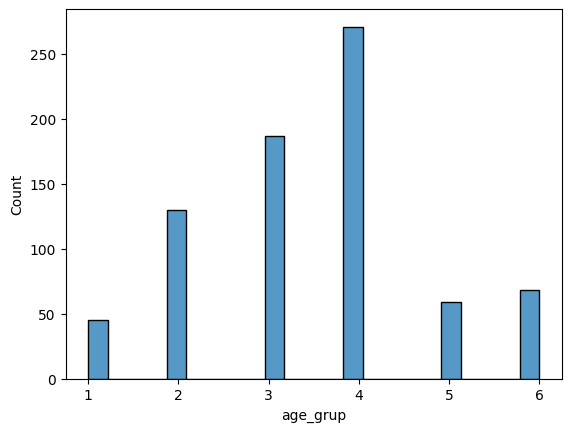

In [264]:
sb.histplot(data=df, x=df["age_grup"])

<Axes: xlabel='family_size', ylabel='Count'>

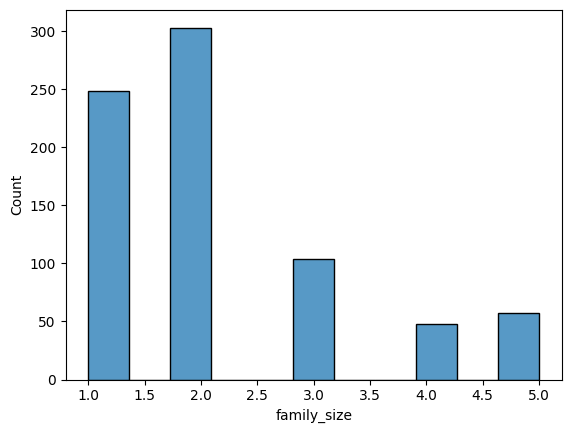

In [265]:
sb.histplot(data=df, x=df["family_size"])

**Вывод: при визуальном осмотре явно видно отсутствие нормального распределения в обоих столбцах данных**

* Тест Шапиро-Уилка для возрастных групп

In [266]:
a, b = stats.shapiro(df["age_grup"])
print(a, b)

0.9255251884460449 6.065451251043218e-19


**Вывод: тестовая статистика равна 0.925 , а соответствующее значение p равно 6.0e-19, Поскольку p-значение меньше 0,05, мы отвергаем гипотезу о нормальном распределении данных.**

* Тест Шапиро-Уилка для размера семьи

In [267]:
a1, b1 = stats.shapiro(df["family_size"])
print(a1, b1)

0.8174997568130493 1.7511704593804305e-28


**Вывод: тестовая статистика равна 0.82 , а соответствующее значение p равно 1.75e-28, Поскольку p-значение меньше 0,05, мы отвергаем гипотезу о нормальном распределении данных.**

In [268]:
# проверка
import math
import numpy as np
from scipy.stats import shapiro
from scipy. stats import lognorm

#perform Shapiro-Wilk test for normality
shapiro(df["family_size"])


ShapiroResult(statistic=0.8174997568130493, pvalue=1.7511704593804305e-28)

* Кретерий Пирсона для возрастных групп

In [269]:
a2, b2 = stats.normaltest(df["age_grup"])
print(a2, b2)

6.758307593182432 0.03407627800030908


**Вывод: значение p = 0.03, гипотезу о нормальном распределении данных отвергаем**

In [270]:
a3, b3 = stats.normaltest(df["family_size"])
print(a3, b3)

102.798849447087 4.758975506349418e-23


**Вывод: значение p = 4.76e-23, гипотезу о нормальном распределении данных отвергаем**

* Найти асимметрию выборки

In [271]:
stats.skew(df["age_grup"], bias=True)

0.10322820894903387

**Вывод: ассиметрия 0.1, в пределах -0.4 до 0.4**

In [272]:
stats.skew(df["family_size"], bias=True)

1.0501461635298588

**Вывод: ассиметрия 1.05**

* Найти эксцесс выборки

In [273]:
stats.kurtosis(df["age_grup"], fisher=True)

-0.3538603577218029

In [274]:
stats.kurtosis(df["family_size"], fisher=True)

0.35629944517066425

* Найти среднее квадратичное отклонение (сигма)

In [275]:
df["age_grup"].std()

1.2812294029660558

In [276]:
df["family_size"].std()

1.1689287806109017

**ВЫВОД: гипотезу о нормальном распределении данных отвергаем**